# **First Machine Learning Project**

For our first machine learning project, we are trying to predict the type of Iris flower, using some measurements of the flower. There are 3 types of Iris flowers we are considering in our dataset

Iris Versicolor
Iris Setosa
Iris Virginica
Those are the ‘labels’ of our machine learning task.

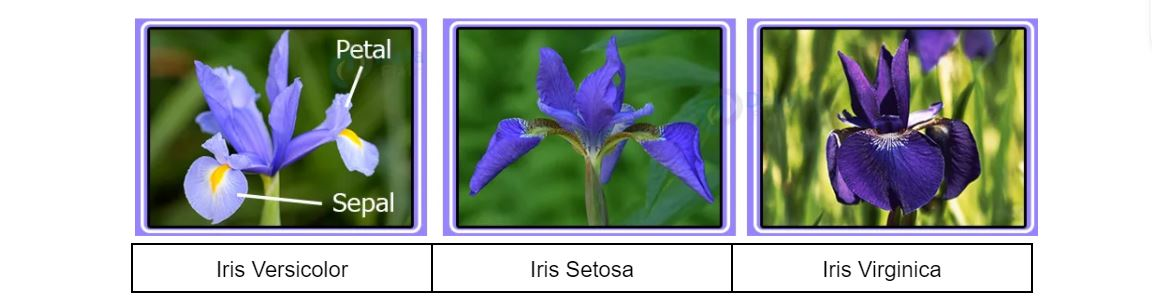

This dataset was prepared by R. A. Fischer, way back in 1936! It doesn’t contain photos of flowers. Instead, it contains the following measurements of individual flowers:

* Sepal length
* Sepal width
* Petal length
* Petal width

Those are the attributes or features of our machine learning task. All measurements are in centimeters and the dataset contains such measurements for 150 flowers belonging to the above three subtypes of Iris. It’s one of the most popular datasets for developing and evaluating machine learning algorithms.

***Importing libraries***

In [ ]:
import numpy as np
import pandas as pd                   # for data handling
import seaborn as sns                 # for visualizations
import matplotlib.pyplot as plt       # for visualizations

# Set seaborn color palette
sns.set_palette('husl')

# Jupyter magic
%matplotlib inline

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier

***Load the data***

The following code can be used to download the data and load it into a data structure called a DataFrame defined in Pandas.

In [ ]:
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv'
col_name = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']

dataset = pd.read_csv(url, names=col_name)

In [ ]:
print('Dataset Size')
dataset.shape

Dataset Size


(150, 5)

***Looking at the top five rows of the dataset***

Pandas provides a function called head() to print the top five rows of the dataset.

In [ ]:
print('First Five Rows of the Dataset')
dataset.head()

First Five Rows of the Dataset


,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


***Look at some summary statistics of the dataset***


Pandas provides a function called describe() to compute and print out summary statistics for each class, such as the number of data points, mean value, standard deviation, minimum value, maximum value and the quartiles.

In [ ]:
print('Summary Statistics of the Dataset')
dataset.describe()

Summary Statistics of the Dataset


,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


***See what data types we are dealing with, and the memory usage of the dataset***

Pandas provides a function called info() that prints out the data type of each column andthe memory usage.


In [ ]:
print('Data Types and Memmory Usage')
dataset.info()

Data Types and Memmory Usage
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-length  150 non-null    float64
 3   petal-width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


***The number of classes and the number of data***


Pandas provides a function called value_counts() to show us the number of data in each class.

The value_counts() functions should be called on the column that contains the class labels. That is obtained by dataset[‘class’], on which the value_counts() function should be called.



In [ ]:
print('classes and the number of data')
dataset['class'].value_counts()

classes and the number of data


,count
class,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


***Violin Plots***

Sometimes, the summary statistics such as mean, standard deviation and median are not enough to understand a dataset. Are the values clustered around the median? Are they spread out normally or skewed to one side? A violin plot can help you to answer these questions. This can show you peaks of the data and visualizes the distribution of the dataset.

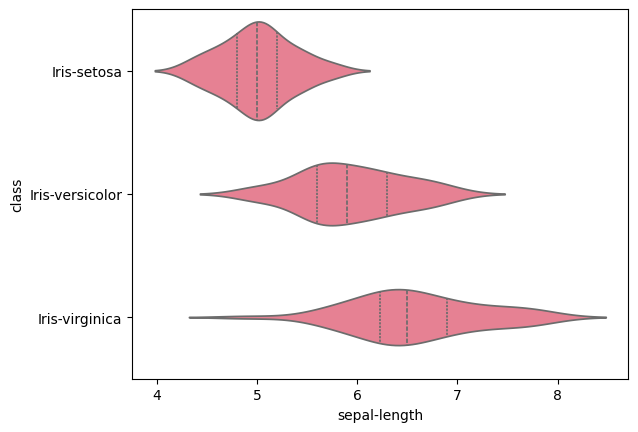

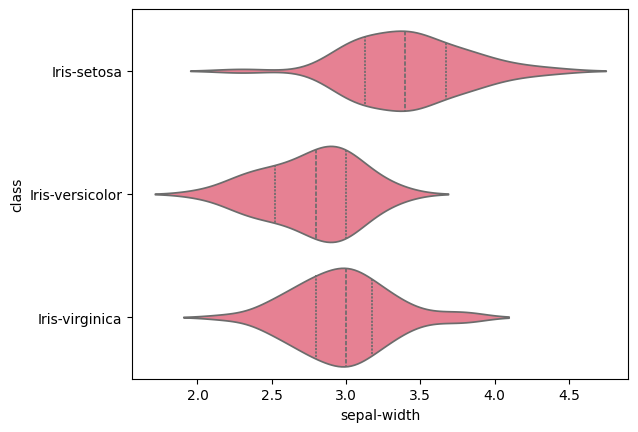

In [ ]:
sns.violinplot(y='class', x='sepal-length', data=dataset, inner='quartile')
plt.show()
sns.violinplot(y='class', x='sepal-width', data=dataset, inner='quartile')
plt.show()


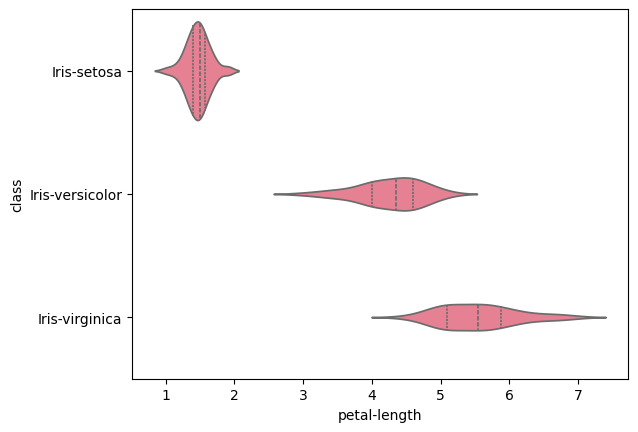

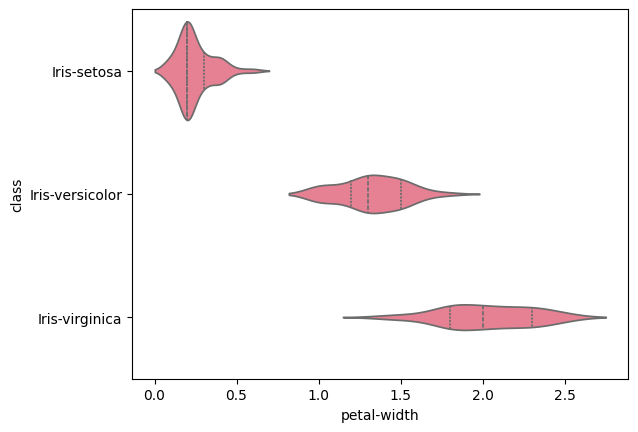

In [ ]:
sns.violinplot(y='class', x='petal-length', data=dataset, inner='quartile')
plt.show()
sns.violinplot(y='class', x='petal-width', data=dataset, inner='quartile')
plt.show()

***Correlation Heatmap***

Correlation between two attributes tells you about the interdependency between the two attributes. A correlation heatmap shows a 2D visualization of such interdependencies between each pair of attributes. Whether two attributes are highly correlated or not is reflected by the colors of the heatmap.

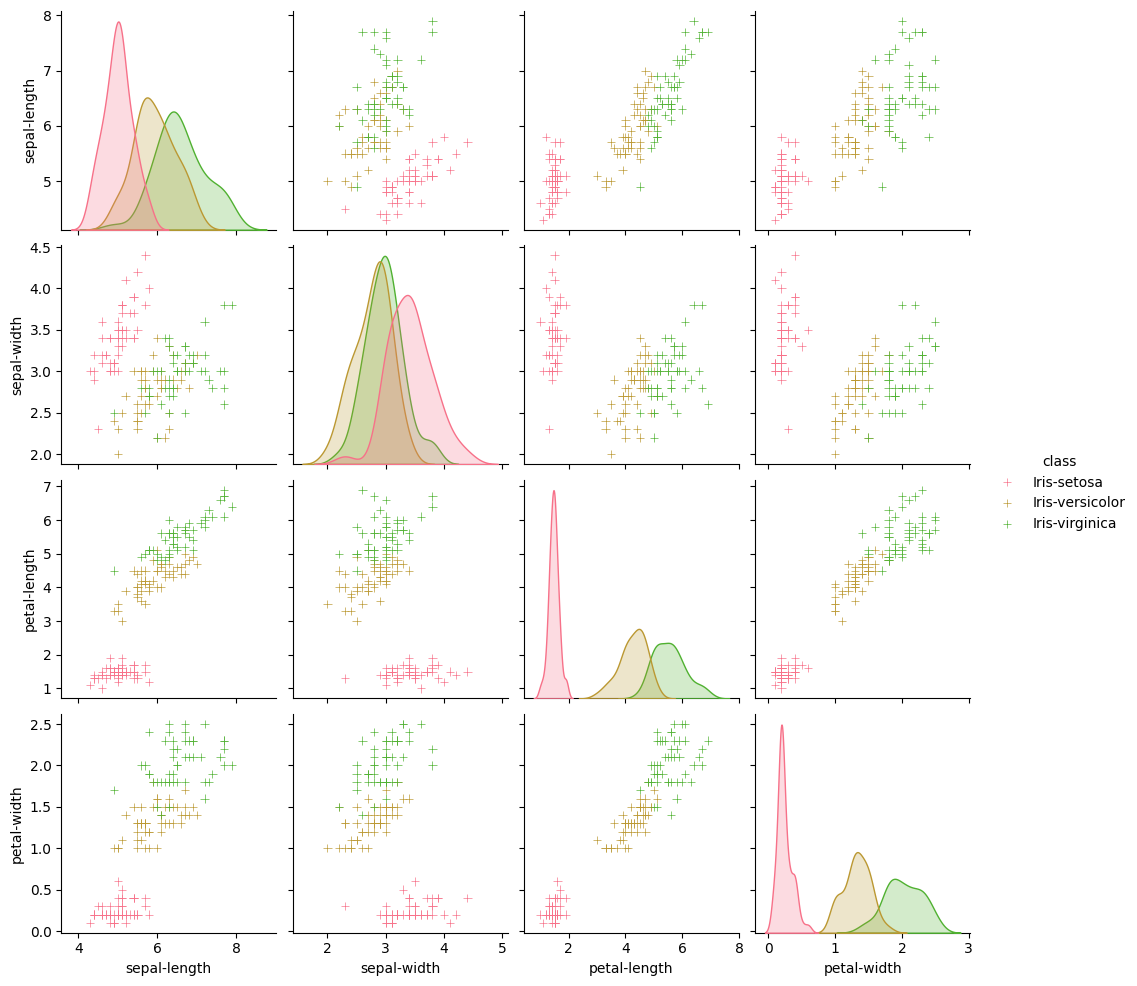

In [ ]:
sns.pairplot(dataset, hue='class', markers='+')
plt.show()

In the first line we specify the size of the figure, in inches. In this case the width is 7 inches and the height is 5 inches. Then we call the heatmap function of Seaborn, to which we pass the correlation matrix of the attributes of the dataset. The calculation of the correlation matrix is achieved by calling the corr() function on the dataset. The cmap variable sets the type of color map we would like to see on the heatmap. Here we have specified cmap=’cubehelix_r’. Have a look at the documentation of the Seaborn library to find out the other kinds of color maps that are available for producing a colorful correlation heatmap.

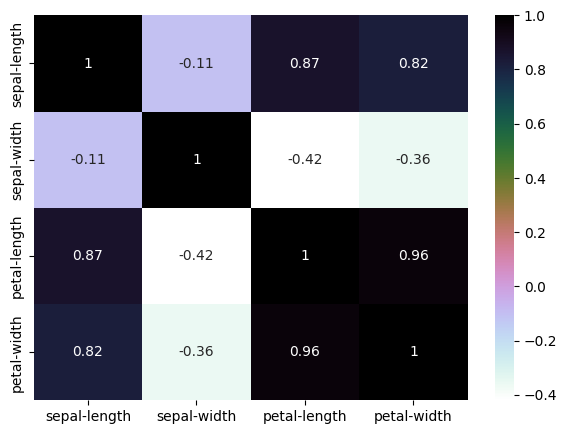

In [ ]:
plt.figure(figsize=(7,5))

numeric_data = dataset.drop(columns=['class'])

sns.heatmap(numeric_data.corr(), annot=True, cmap='cubehelix_r')
plt.show()

***SPLIT the Data for Evaluation***

Before you build the model you need to think about how you are going to test the model that you build so that you can be sure that the model is giving you reliable answers to the question you are asking based on the training data given to it. The only way to test the model is to use some of the traning data samples as test samples. So the first thing you should do is split the data into a training dataset and a test dataset. You should not use the same dataset for training and testing.

In [ ]:
# Drop the column that contains the class labels
X = dataset.drop(['class'], axis=1)
Y = dataset['class']
print(f'X shape: {X.shape} | Y shape: {Y.shape} ')

X shape: (150, 4) | Y shape: (150,) 


In [ ]:
# Split: 80% for training. 20% for testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

***Train Classifier***

There are a lot of Machine Learning models that we can use in the scikit learn library, but for this project we will use a modle called the Support Vector Machine (SVM)

In [ ]:
# Support vector machine algorithm
from sklearn.svm import SVC
svn = SVC()
svn.fit(X_train, Y_train)

SVC()

***Evaluating Classifier***

Now you need to evaluate the classifier to make sure it is working the way we want it to work and giving us mostly correct answers. Also, by evaluating the classifier, we can try to improve the classifier by changing some of the things (design decisions) that we took in the process of building this classifier, including the data pre-processing steps we took. Evaluation allows us to check how well we have done the Machine Learning. Using the accuracy_score function provided by sklearn.metrics the classifier's performance is evaluated

In [ ]:
# Model evaluation
# Predict from the test dataset
predictions = svn.predict(X_test)
# Calculate the accuracy
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, predictions)

0.9666666666666667

***Detailed Evaluation with Precision, Recall and F1-Score***

There are multiple ways of evaluating a classification model. One of the easiest and simplest methods is to look at the accuracy calculated by dividing the correct numbers of labels we got from the total number of samples we tested. Other methods to evaluate would show us different aspects of the model quality. We have to decide on the most suitable evaluation method depending on the problem we are trying to solve. We will also check the Precision, Recall, and F1-Score in this example.

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



***Error Analysis with the Confusion Matrix***

In a multi-label classification problem like the one that we are solving, we can also check what classifications were incorrectly labeled by the classifier so that we may be able to give more attention to that class label in modifying our ML model. The summary table of True Label against the Predicted Label is called the Confusion Matrix.

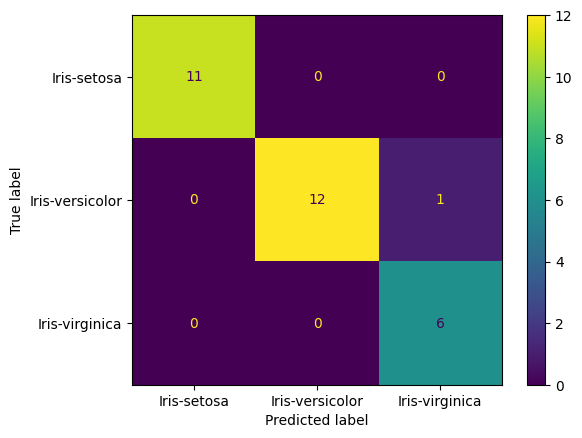

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm=confusion_matrix(Y_test, predictions, labels=svn.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=svn.classes_)
disp.plot()
plt.show()

***Saving the ML Model***

Typically when we train a model with a large number of data points, it may take a long time, and once we build a good ML model, we would like to keep it and use it later rather than having to train the model again.


The pickle module is used to serialize/deserialize a python object structure so that it can be saved as a binary and loaded and used later. In this example, Serialize means converting the model to a form that can be stored in a storage media, and Deserializing is the process of reading the model from storage and putting it into a form that can be executed in the Python environment that it was built. This is similar to writing a file and reading it later.

In [ ]:
# Save the model
import pickle
with open('SVM.pickle', 'wb') as f:
    pickle.dump(svn, f)

***Loading and Using a Saved Model to Classify New Data***

In [ ]:
with open('SVM.pickle', 'rb') as f:
     model = pickle.load(f)
model.predict(X_test)

array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica'], dtype=object)